In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = '/content/drive/MyDrive/Amazon Reviews'
data_path = path + '/AMAZON_FASHION_v2.parquet'

In [6]:
data = pd.read_parquet(data_path)

In [7]:
data.head().T

,0,1,2,3,4
overall,5,2,4,2,3
verified,True,True,False,True,False
reviewTime,"10 20, 2014","09 28, 2014","08 25, 2014","08 24, 2014","07 27, 2014"
reviewText,Exactly what I needed.,"I agree with the other review, the opening is ...",Love these... I am going to order another pack...,too tiny an opening,Okay
summary,perfect replacements!!,"I agree with the other review, the opening is ...",My New 'Friends' !!,Two Stars,Three Stars


In [8]:
data.tail().T

,883631,883632,883633,883634,883635
overall,5,5,3,3,5
verified,True,True,True,True,True
reviewTime,"02 21, 2017","11 25, 2016","11 10, 2016","11 10, 2016","08 9, 2016"
reviewText,I absolutely love this dress!! It's sexy and ...,I'm 5'6 175lbs. I'm on the tall side. I wear a...,Too big in the chest area!,"Too clear in the back, needs lining",Ordered and was slightly small. Worked with th...
summary,I absolutely love this dress,I wear a large and ordered a large and it stil...,Three Stars,Three Stars,The quality is excellent and it is so cute


In [45]:
df = data.copy()

<center><h1>EDA</h1></center>

In [46]:
### structural Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883636 entries, 0 to 883635
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   overall     883636 non-null  int64 
 1   verified    883636 non-null  bool  
 2   reviewTime  883636 non-null  object
 3   reviewText  882403 non-null  object
 4   summary     883103 non-null  object
dtypes: bool(1), int64(1), object(3)
memory usage: 27.8+ MB


In [47]:
### checking Missing Values
df.isnull().sum()

overall          0
verified         0
reviewTime       0
reviewText    1233
summary        533
dtype: int64

In [48]:
### drop missing values
df.dropna(inplace=True)

In [49]:
df.isnull().sum()

overall       0
verified      0
reviewTime    0
reviewText    0
summary       0
dtype: int64

In [50]:
### shape
df.shape

(881900, 5)

<Axes: xlabel='verified', ylabel='count'>

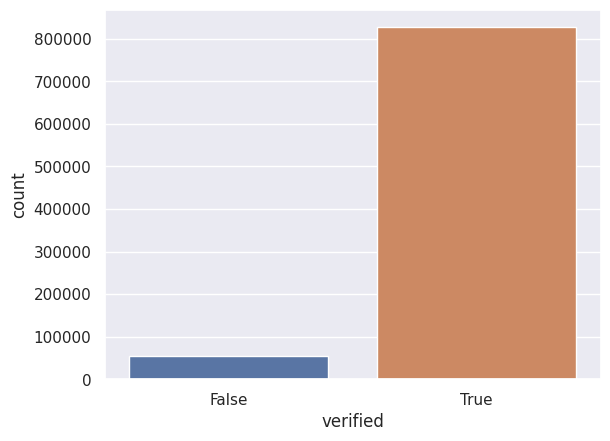

In [51]:
### Check verified/unverified reviews distribution
sns.set(style='darkgrid')
sns.countplot(data=df, x='verified')

In [52]:
### drop unverified reviews
df = df.loc[df.verified==True]
df.drop(columns=['verified'], inplace=True)
df.head()

,overall,reviewTime,reviewText,summary
0,5,"10 20, 2014",Exactly what I needed.,perfect replacements!!
1,2,"09 28, 2014","I agree with the other review, the opening is ...","I agree with the other review, the opening is ..."
3,2,"08 24, 2014",too tiny an opening,Two Stars
5,5,"07 19, 2014",Exactly what I wanted.,Five Stars
6,4,"05 31, 2014",These little plastic backs work great. No mor...,Works great!


In [53]:
df.shape

(827049, 4)

<Axes: xlabel='overall', ylabel='count'>

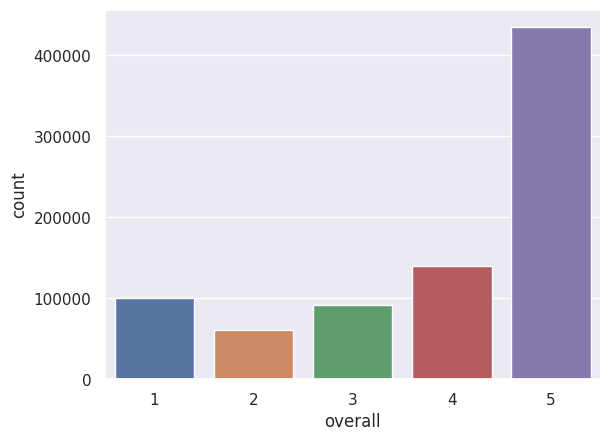

In [54]:
### overall distribution
sns.countplot(data=df, x='overall')

In [55]:
### length of reviewText
df['reviewLength'] = df.reviewText.apply(lambda text: len(text.split(' ')))
df.head()

,overall,reviewTime,reviewText,summary,reviewLength
0,5,"10 20, 2014",Exactly what I needed.,perfect replacements!!,4
1,2,"09 28, 2014","I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",48
3,2,"08 24, 2014",too tiny an opening,Two Stars,4
5,5,"07 19, 2014",Exactly what I wanted.,Five Stars,4
6,4,"05 31, 2014",These little plastic backs work great. No mor...,Works great!,28


In [56]:
df.loc[0]

overall                              5
reviewTime                 10 20, 2014
reviewText      Exactly what I needed.
summary         perfect replacements!!
reviewLength                         4
Name: 0, dtype: object

<Axes: xlabel='reviewLength', ylabel='Count'>

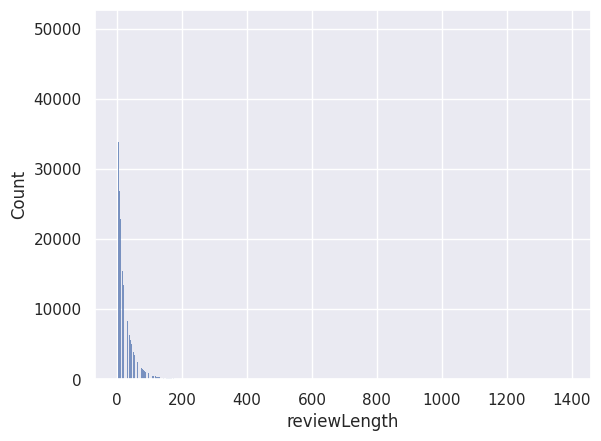

In [57]:
### checking review length distribution
sns.histplot(data=df, x='reviewLength')

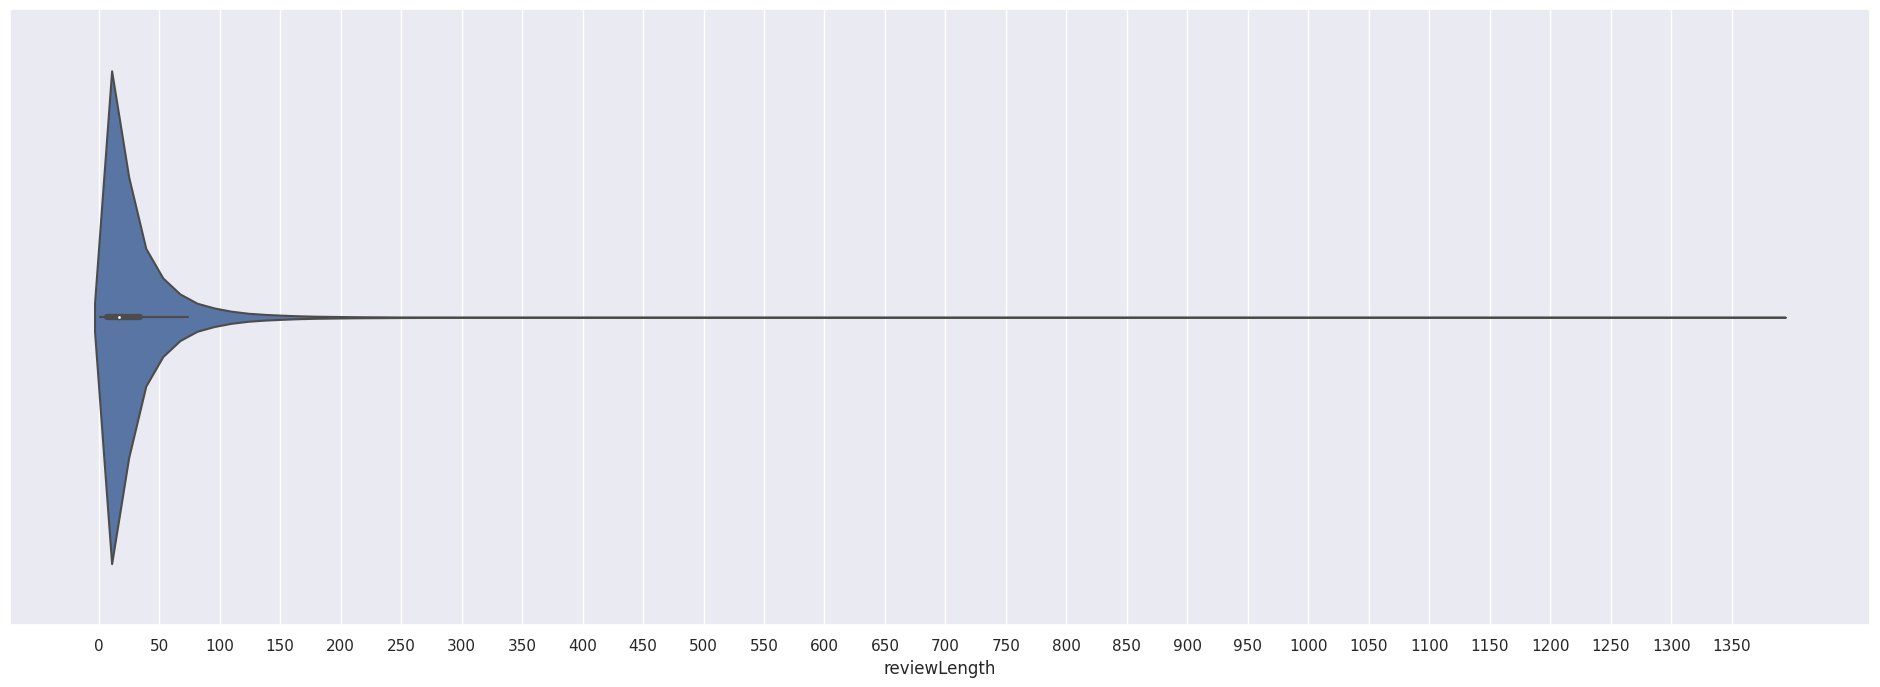

In [58]:
### rare length comments
plt.figure(figsize=(24, 8))
sns.violinplot(data=df, x='reviewLength')
plt.xticks(list(range(0, 1400, 50)))
plt.show()

In [59]:
q1 = df.reviewLength.quantile(0.25)
q3 = df.reviewLength.quantile(0.75)
IQR = q3 - q1

In [60]:
upper_bound = q3 + (1.5*IQR)

In [61]:
df[df.reviewLength > upper_bound]

,overall,reviewTime,reviewText,summary,reviewLength
9,3,"04 13, 2013",I had used my last el-cheapo fake leather ciga...,Top Clasp Broke Within 3 days!,181
14,4,"03 12, 2010",Received the case in less than a week...was ve...,Great bargain,81
55,3,"05 6, 2016",Lining in lighter pocket tore within a very sh...,Could be better.,122
63,5,"06 4, 2015",I had been looking for a replacement for a cig...,Better than I expected,131
86,5,"05 8, 2014",I cannot believe this case cost as little as i...,More than worth it,79
...,...,...,...,...,...
883565,2,"08 1, 2016",So the black dress (not sure about the other c...,NO liner and watch out if you're busty,245
883587,1,"01 11, 2017","Cute print, material as expected, seams ok, bu...",Dont bother,83
883591,2,"08 6, 2016",Really sad that the sizing is so inconsistent....,Inconsistent sizing on different styles!,114
883610,2,"03 21, 2017",Beautiful dress! But runs small! I am a normal...,Way to small!,78


In [62]:
df = df[~(df.reviewLength > 200)]

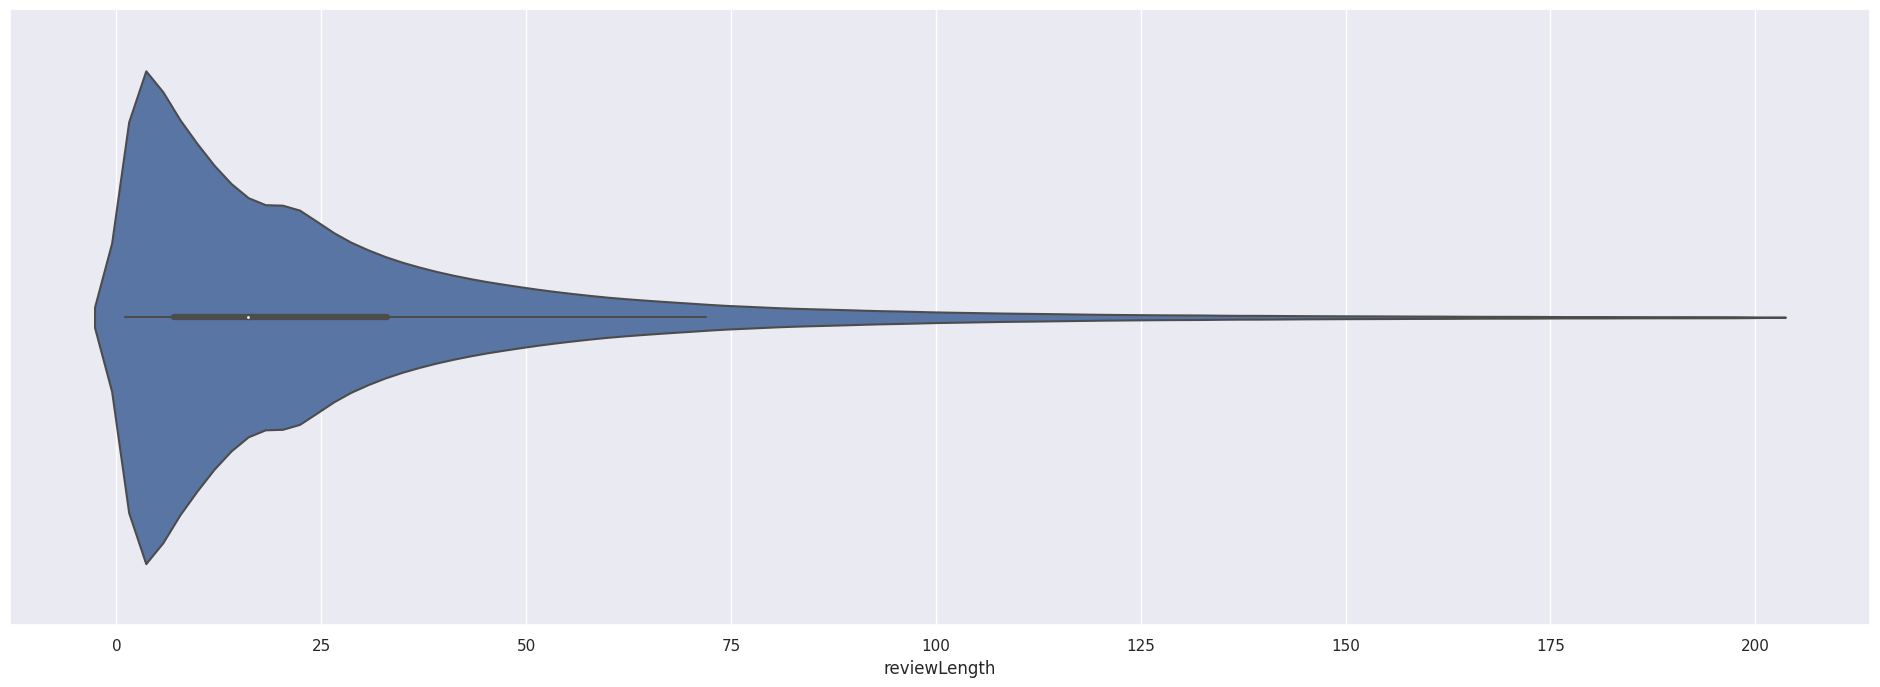

In [63]:
plt.figure(figsize=(24, 8))
sns.violinplot(data=df, x='reviewLength')
plt.xticks(list(range(0, 225, 25)))
plt.show()

In [64]:
df.head()

,overall,reviewTime,reviewText,summary,reviewLength
0,5,"10 20, 2014",Exactly what I needed.,perfect replacements!!,4
1,2,"09 28, 2014","I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",48
3,2,"08 24, 2014",too tiny an opening,Two Stars,4
5,5,"07 19, 2014",Exactly what I wanted.,Five Stars,4
6,4,"05 31, 2014",These little plastic backs work great. No mor...,Works great!,28


In [65]:
df.shape

(823065, 5)

In [66]:
df.to_parquet(path+'/AMAZON_FASHION_v3.parquet', index=False)